In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
# Read the dataset

car_df = pd.read_csv(".\car_price_dataset\car_data.csv")
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car_df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_df.shape

(301, 9)

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# Checking the categorical data

print(car_df["Fuel_Type"].value_counts())
print(car_df["Seller_Type"].value_counts())
print(car_df["Transmission"].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [9]:
print(car_df["Car_Name"].value_counts().shape)

(98,)


In [10]:
print(car_df["Car_Name"].value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [11]:
# Encoding the categorical data
car_df.replace({"Fuel_Type":
               {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

car_df.replace({"Seller_Type":
               {'Dealer':0, 'Individual':1}}, inplace=True)

car_df.replace({"Transmission":
               {'Manual':0, 'Automatic':1}}, inplace=True)

In [12]:
car_df.shape

(301, 9)

In [13]:
car_df.head(8)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0


In [14]:
# Splitting the data into train and test data

X = car_df.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_df['Selling_Price']

In [15]:
print(X, Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [17]:
X_train, X_test, Y_train, Y_Test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [18]:
# Linear Regression

reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [19]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [20]:
# Prediction on training data

training_data_prediction = reg.predict(X_train)

In [21]:
# R square error

error_score = metrics.r2_score(Y_train, training_data_prediction)

print(error_score)

0.8799451660493708


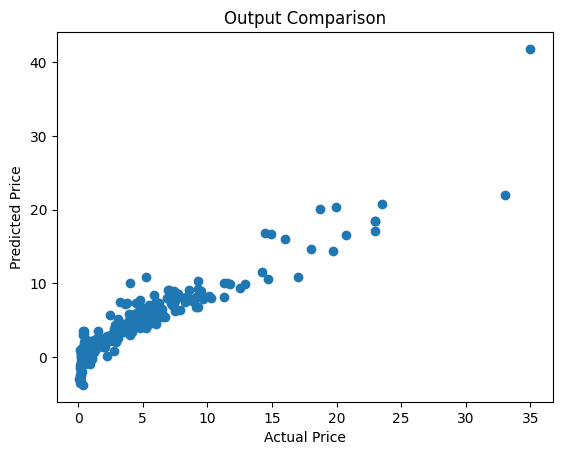

In [22]:
# Visualization

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Output Comparison")
plt.show()


In [23]:
test_data_prediction = reg.predict(X_test)

In [24]:
error_score = metrics.r2_score(Y_Test, test_data_prediction)
print(error_score)

0.8365766715026374


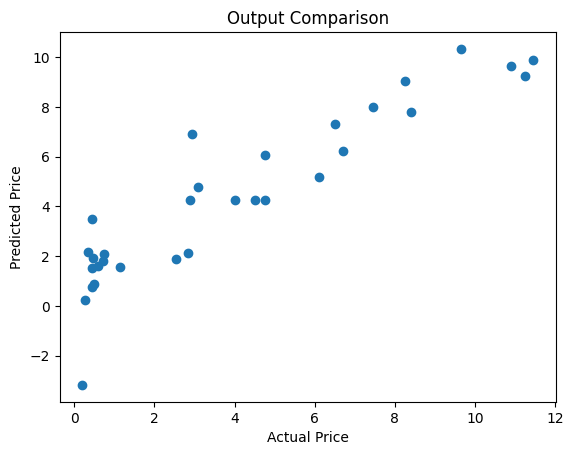

In [25]:
plt.scatter(Y_Test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Output Comparison")
plt.show()

In [26]:
# Lasso Regression

lass_reg = Lasso()

In [27]:
lass_reg.fit(X_train, Y_train)

Lasso()

In [28]:
training_data_prediction = lass_reg.predict(X_train)

In [29]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8427856123435794


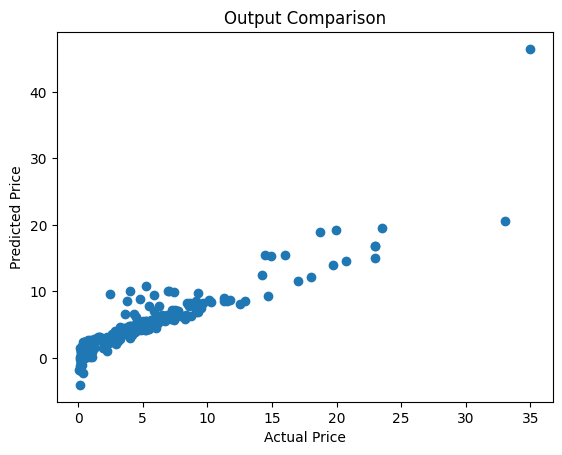

In [30]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Output Comparison")
plt.show()

In [31]:
test_data_prediction = lass_reg.predict(X_test)

In [32]:
error_score = metrics.r2_score(Y_Test, test_data_prediction)
print(error_score)

0.8709167941173195


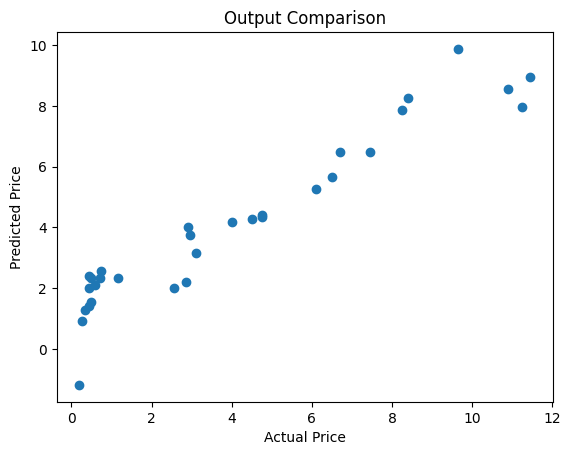

In [33]:
plt.scatter(Y_Test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Output Comparison")
plt.show()

In [34]:
import pickle


In [35]:
filename = 'car_price.sav'
pickle.dump(lass_reg, open(filename, 'wb'))

In [36]:
# loading the saved model
loaded_model = pickle.load(open('car_price.sav', 'rb'))

In [37]:
import numpy as np
input_data = (2014, 4.45, 27500, 0, 1, 0, 1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(f"Price of the Car is about {prediction}")


Price of the Car is about [3.24094747]


c:\Users\mdref\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [39]:
car_df['Fuel_Type'] = pd.to_numeric(car_df['Fuel_Type'])
car_df['Seller_Type'] = pd.to_numeric(car_df['Seller_Type'], errors='coerce')
car_df['Transmission'] = pd.to_numeric(car_df['Transmission'], errors='coerce')

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
